In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
d = 6 * 10**(-3) # m
rho = 874 # kg * m^-3
rho_0 = 1.293 # kg * m^-3
g = 9.81
eta = 1.81 * 10**(-5) # kg * m^-1 * s^-1
P = 101325 # Pa
b = 8.2 * 10**(-3) # Pa * m
s = 1 * 10**(-3) # m
q_0 = 1.60217662 * 10**(-19) # C

p = pd.read_excel('PE1data.xlsx', names=['path', 't1', 't2', 'U', 'd'])
p2 = pd.DataFrame([[1, 10, -10, 600, 6]], columns=['path', 't1', 't2', 'U', 'd'])
p = p.append(p2, ignore_index=True)
p

,path,t1,t2,U,d
0,1,19.981800,35.223597,607.2,6
1,1,12.303309,22.595193,607.2,6
2,1,13.047523,9.122646,607.2,6
3,1,23.959538,21.357206,607.2,6
4,1,20.131998,34.894079,607.2,6
...,...,...,...,...,...
396,1,34.510632,38.615163,-293.7,6
397,1,33.386322,43.361326,-282.7,6
398,1,16.788661,29.291318,-265.1,6
399,1,26.254386,21.055792,-265.1,6


In [3]:
q = []
q.append(9*np.pi*d*(s/p.t1 + s/p.t2) / p.U * np.sqrt(eta**3 * s/p.t1 / (g * (rho-rho_0))))
q.append(4*np.pi/3 * (np.sqrt((b/(2*P))**2+9*eta*(s/p.t1)/(2*g*(rho-rho_0)))-b/(2*P))**3 
         * (rho-rho_0)*g*d*(s/p.t1 + s/p.t2) / (p.U * s/p.t1))

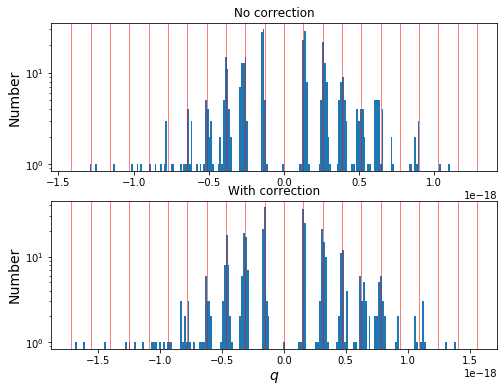

[1.41230383e-19 1.62628736e-19]


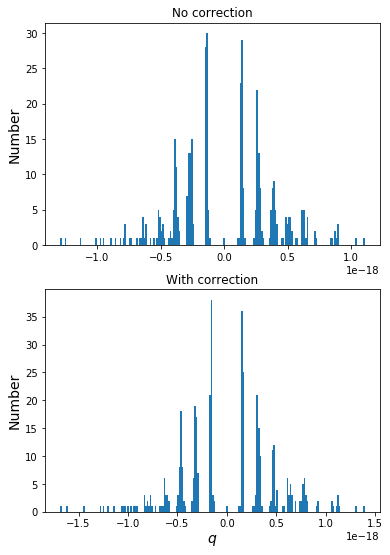

In [4]:
lbl = ['No correction', 'With correction']
fig, ax = plt.subplots(2, 1, figsize=(8, 6))
q_min = np.zeros(2)
for j in range (2):
    n, bins, _ = ax[j].hist(q[j], bins = 200)
    q_min[j] = -bins[np.argmax(n)]
    for i in range (22):
        ax[j].axvline(x=(-11+i)*(q_min[j]*(0.91+0.05*j)), color='r', linewidth=0.5)
    ax[j].set_ylabel('Number', fontsize=14)
    ax[j].set_yscale('log')
    ax[j].set_title(lbl[j])
ax[1].set_xlabel('$q$', fontsize=14)
plt.show()
print(q_min)

lbl = ['No correction', 'With correction']
fig, ax = plt.subplots(2, 1, figsize=(6, 9))
for j in range (2):
    n, bins, _ = ax[j].hist(q[j], bins = 200)
    ax[j].set_ylabel('Number', fontsize=14)
    ax[j].set_title(lbl[j])
ax[1].set_xlabel('$q$', fontsize=14)
plt.show()

In [9]:
for j in range (2):
    for i in range (21):
        temp = q[j][index[j]==(-11+i)]
        if len(temp)==0: continue
        print(-11+i, ":", np.average(temp), 2*np.std(temp)/np.sqrt(len(temp)))
    print('\n')

-10 : -1.2684983306529992e-18 3.2756179199485845e-20
-9 : -1.1330421555467304e-18 0.0
-8 : -9.9683928413367e-19 2.6316749615656084e-20
-7 : -8.986724414376976e-19 4.814415228949877e-20
-6 : -7.7517412272044e-19 2.1344200222413735e-20
-5 : -6.387891298914158e-19 1.2047899417092831e-20
-4 : -5.104830461136009e-19 1.1990196001397526e-20
-3 : -3.837658319999087e-19 5.335424262732624e-21
-2 : -2.687462980784559e-19 3.573470491850767e-21
-1 : -1.3862845551846747e-19 1.914158657778558e-21
0 : 0.0 0.0
1 : 1.369869362429949e-19 2.1808499955328726e-21
2 : 2.6671307283608744e-19 3.773157981689967e-21
3 : 3.868472818689696e-19 5.513960448104505e-21
4 : 5.121559000647794e-19 1.1444791448196119e-20
5 : 6.289393224254746e-19 7.556034196836881e-21
6 : 7.475648241996326e-19 4.850069304285067e-20
7 : 8.784588459069146e-19 1.2389021813163839e-20
8 : 1.0442953051257623e-18 0.0
9 : 1.1050688536714827e-18 0.0


-11 : -1.6861035993979856e-18 0.0
-10 : -1.6172227546142458e-18 0.0
-9 : -1.4466004719563407e-18 

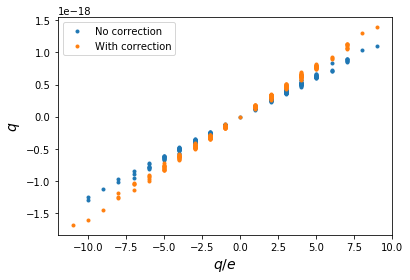

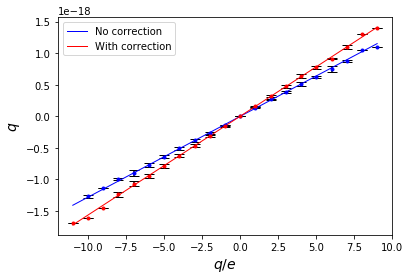

y = 1.2813713572167118e-19 x + -1.1994100154250342e-21 error : 6.413996316798833e-21 chi : 6.624670355438827e-35
y = 1.5669993300013968e-19 x + 1.1515737688766943e-21 error : 7.840870662737137e-21 chi : 1.0106968378686045e-34


In [6]:
index = np.zeros((2, len(p)))
for i in range (len(p)):
    target0 = q[0][i]
    target1 = q[1][i]
    for j in range (11):
        if (target0/(q_min[0]*0.91)>=(0.5+j) and target0/(q_min[0]*0.91)<(1.5+j)): index[0][i]=j+1
        if (target1/(q_min[1]*0.96)>=(0.5+j) and target1/(q_min[1]*0.96)<(1.5+j)): index[1][i]=j+1
    for j in range (11):
        if (target0/(q_min[0]*0.91)<=(-0.5-j) and target0/(q_min[0]*0.91)>(-1.5-j)): index[0][i]=-j-1
        if (target1/(q_min[1]*0.96)<=(-0.5-j) and target1/(q_min[1]*0.96)>(-1.5-j)): index[1][i]=-j-1
for j in range (2):
    plt.plot(index[j], q[j], '.', label=lbl[j])
plt.xlabel('$q/e$', fontsize=14)
plt.ylabel('$q$', fontsize=14)
plt.legend()
plt.show()

qavg=np.zeros((2, 21))
qerr=np.zeros((2, 21))
for j in range (2):
    for i in range (21):
        temp = q[j][index[j]==(-11+i)]
        if len(temp)==0: continue
        qavg[j][i]=np.average(temp)
        qerr[j][i]=np.std(temp)

t = [-11+i for i in range (21)]
z0 = np.polyfit(index[0], q[0], 1)
z1 = np.polyfit(index[1], q[1], 1)
p0 = np.poly1d(z0)
p1 = np.poly1d(z1)
chi_0 = np.sum((q[0]-p0(q[0]))**2)
chi_1 = np.sum((q[1]-p1(q[1]))**2)
        
plt.errorbar(t[1:], qavg[0][1:], yerr=qerr[0][1:], fmt="b.", linestyle="", ecolor='k', capsize=5)
plt.errorbar(t, qavg[1], yerr=qerr[1], fmt="r.", linestyle="", ecolor='k', capsize=5)
plt.plot(t, p0(t), 'b-', linewidth=1, label = lbl[0])
plt.plot(t, p1(t), 'r-', linewidth=1, label = lbl[1])
plt.xlabel('$q/e$', fontsize=14)
plt.ylabel('$q$', fontsize=14)
plt.legend()
plt.show()

sx0 = np.var(index[0])*len(p)
sx1 = np.var(index[1])*len(p)

print("y =", z0[0], "x +", z0[1], "error :", np.sqrt(chi_0/(400*sx0)), "chi :", chi_0)
print("y =", z1[0], "x +", z1[1], "error :", np.sqrt(chi_1/(400*sx1)), "chi :", chi_1)

In [7]:
for i in range (4):
    cut = 2.5+3*i
    iindex=[]
    qq=[]
    for i in range (2):
        middle1=[]
        middle2=[]
        middle1=index[i][index[i]<cut]
        iindex.append(middle1[middle1>-cut])
        middle2=q[i][q[i]/(q_min[i]*(0.91+i*0.05))<cut]
        qq.append(middle2[middle2/(q_min[i]*(0.91+i*0.05))>-cut])
    z0 = np.polyfit(iindex[0], qq[0], 1)
    z1 = np.polyfit(iindex[1], qq[1], 1)
    p0 = np.poly1d(z0)
    p1 = np.poly1d(z1)
    sx0 = np.var(iindex[0])*len(p)
    sx1 = np.var(iindex[1])*len(p)
    chi_0 = np.sum((qq[0]-p0(qq[0]))**2)
    chi_1 = np.sum((qq[1]-p1(qq[1]))**2)
    print(cut-0.5)
    print(z0[0], z0[1], "error :", np.sqrt(chi_0/(len(p)*sx0)), "chi :", chi_0)
    print(z1[0], z1[1], "error :", np.sqrt(chi_1/(len(p)*sx1)), "chi :", chi_1)
    print('\n')

2.0
1.3479333161124155e-19 -9.256230130268288e-22 error : 5.1162264443293836e-21 chi : 9.821132238002674e-36
1.5830422225952793e-19 3.527883237137546e-22 error : 6.007683036549011e-21 chi : 1.3541789704314346e-35


5.0
1.2902534565672257e-19 -8.449961014072231e-22 error : 6.2245355292896335e-21 chi : 4.3158784043643076e-35
1.568683165260202e-19 1.1229462172611106e-21 error : 7.564596607375199e-21 chi : 6.396782890668151e-35


8.0
1.2838206343001746e-19 -1.224392943798622e-21 error : 6.388349845960106e-21 chi : 6.052883220056897e-35
1.566257344465188e-19 1.3385120341827307e-21 error : 7.790427102376059e-21 chi : 9.157272546371358e-35


11.0
1.2813713572167118e-19 -1.1994100154250342e-21 error : 6.4059938229567154e-21 chi : 6.624670355438827e-35
1.5669993300013968e-19 1.1515737688766943e-21 error : 7.831087913247392e-21 chi : 1.0106968378686045e-34




In [10]:
for i in range (4):
    cut = 2.5+3*i
    iindex=[]
    qq=[]
    for i in range (2):
        middle1=[]
        middle2=[]
        middle1=index[i][index[i]<cut]
        iindex.append(middle1[middle1>-cut])
        middle2=q[i][q[i]/(q_min[i]*(0.91+i*0.05))<cut]
        qq.append(middle2[middle2/(q_min[i]*(0.91+i*0.05))>-cut])
    z0 = np.polyfit(iindex[0], qq[0], 1)
    z1 = np.polyfit(iindex[1], qq[1], 1)
    p0 = np.poly1d(z0)
    p1 = np.poly1d(z1)
    sx0 = np.var(iindex[0])*len(p)
    sx1 = np.var(iindex[1])*len(p)
    chi_0 = np.sum((qq[0]-p0(qq[0]))**2)
    chi_1 = np.sum((qq[1]-p1(qq[1]))**2)
    print(cut-0.5)
    print(z0[0]/q_0*100, "error :", np.sqrt(chi_0/(len(p)*sx0))/q_0*100)
    print(z1[0]/q_0*100, "error :", np.sqrt(chi_1/(len(p)*sx1))/q_0*100)
    print('\n')

2.0
84.13138097798577 error : 3.1932974058311894
98.80572483920525 error : 3.7497008516757724


5.0
80.53128727887851 error : 3.8850495329844676
97.9095029647981 error : 4.721449878213301


8.0
80.12978208982818 error : 3.9872943882804295
97.75809513842412 error : 4.862402187828741


11.0
79.97691023706935 error : 3.9983068926300493
97.80440623340245 error : 4.8877806700533375


